In [3]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

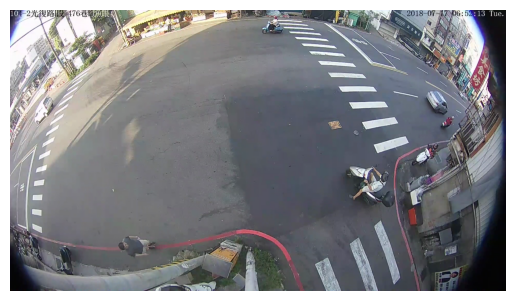

In [12]:
# Open the image
image = Image.open("/workspace/FishEye8k/dataset/Fisheye8K_all_including_train/train/images_all/camera14_A_88.png")
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

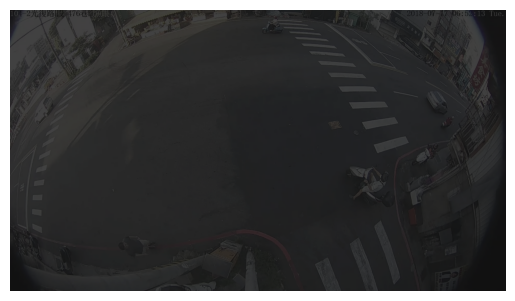

In [13]:
# Create a copy to prevent modifying the original
night_image = image.copy()

# Enhance the brightness and contrast
brightness_enhancer = ImageEnhance.Brightness(night_image)
night_image = brightness_enhancer.enhance(0.5)  # Darken the image

contrast_enhancer = ImageEnhance.Contrast(night_image)
night_image = contrast_enhancer.enhance(0.7)  # Reduce contrast

# Shift the color balance towards blue
night_image = ImageEnhance.Color(night_image).enhance(0.6)  # Reduce color saturation
night_image = ImageEnhance.Brightness(night_image).enhance(0.7)  # Darken further
night_image = ImageEnhance.Contrast(night_image).enhance(0.8)  # Increase contrast

# Save the nighttime image
plt.figure()
plt.imshow(night_image)
plt.axis('off')
plt.show()

In [208]:
import albumentations as A

night_transform = A.Compose([
    # Darken the image
    A.ToGray(p=0.5), # Convert to grayscale first
    # A.ImageCompression(quality_lower=50, quality_upper=99, p=1.0), # Reduce quality/detail
    # A.Downscale(scale_min=0.25, scale_max=0.5, p=1.0), # Downscale/blur
    # A.MultiplicativeNoise(multiplier=(0.6, 1.2), per_channel=True, p=1.0), # Add noise
    # A.GaussNoise(var_limit=(10, 50), p=1.0), # Add gaussian noise
    
    # Adjust color temperature
    # A.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1, p=1.0), # Adjust color
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=0, p=1.0), # Shift hue towards blue
    
    # Add night lighting effects
    A.RandomBrightnessContrast(brightness_limit=(-0.4, 0.01), contrast_limit=(-0.2, 0.2), p=1.0), # Increase contrast
    # A.CoarseDropout(max_holes=8, max_height=32, max_width=32, p=0.5), # Add dark blotches
    #A.GaussianBlur(blur_limit=(3, 7), p=0.5), # Blur edges
    #A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.7, alpha_coef=0.5, p=0.5) # Add fog effect
])

In [209]:
import cv2

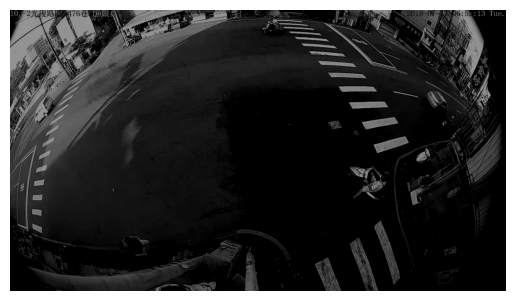

In [223]:
image = cv2.imread('/workspace/FishEye8k/dataset/Fisheye8K_all_including_train/train/images_all/camera14_A_88.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
transformed = night_transform(image=image)
night_image = transformed['image']
plt.figure()
plt.imshow(night_image)
plt.axis('off')
plt.show()